In [63]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [2]:
os.getcwd()

'C:\\Users\\vnarv\\PycharmProjects\\scoring_SDA'

In [3]:

# folder path
dir_path = "C://Users//vnarv//PycharmProjects//scoring_SDA/data/"
#dir_path = "/home/onyxia/scoring_SDA/"

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
print(res)

['2020_US_County_Level_Presidential_Results.csv', 'Education.xls', 'PopulationEstimates.xls', 'PovertyEstimates.xls', 'Unemployment.xls', 'US_County_Level_Presidential_Results_08-16.csv']


# Explore files 

In [5]:
def check_nan(data):
    nb_lines = data.shape[0]
    nb_columns = data.shape[1]

    nb_nan = data.isna().sum() / nb_lines
    part_nan = nb_nan[nb_nan>0]
    
    r = ""
    if not part_nan.empty:
        r += "There are features with NAN values :\n"
        r += f"Number of features with NAN = {len(part_nan.keys())}\n"
        r += f"Number of values with NAN = {sum(data.isna().sum())}\n"
        r += "=" * 88 + "\n"
        r += "[Feature] <--- has empty values ---> [percentage of empty values]\n"
        r += "=" * 88 + "\n"
        for feat, pct_f in part_nan.items():
            r += f"{feat:30s}  <--->  {pct_f:.2%}\n"
        r += "=" * 88 + "\n"
    else:
        r += "There are none features with NAN values\n"
    print("\n\n%s" % r)
    
def check_duplicates(data, keys):
    df_dup = data[data.duplicated(subset=keys, keep=False)]
    r = ""
    if not df_dup.empty:
        r += f"There are duplicates based on keys : {keys}\n"
        display(df_dup.head())
    else:
        r += f"There none duplicates based on keys {keys}\n"
        
    print("\n%s" % r)

In [6]:
for file in res:
    if file.endswith(".csv"):
        t = pd.read_csv(dir_path + file)
        print(f"\n========== File name {file}\n")
        display(t.head())
        print(t.columns)
        check_nan(t)

    elif file.endswith(".xls"):
        # read file
        with open(dir_path + file, mode="rb") as excel_file:
            _excel_file = pd.read_excel(excel_file,)
        print(f"\n========== File name {file}\n")
        print(_excel_file.columns[0])
        _excel_file.set_index(_excel_file.columns[0], inplace=True)
        # drop nan
        _excel_file = _excel_file.dropna(how="all")
        # set header
        header_row = _excel_file.iloc[0]
        df = pd.DataFrame(_excel_file.values[1:], columns=header_row)
        check_nan(df)
    else:
        print("Check files in data folder")


========== File name 2020_US_County_Level_Presidential_Results.csv



,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


Index(['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem',
       'total_votes', 'diff', 'per_gop', 'per_dem', 'per_point_diff'],
      dtype='object')


There are none features with NAN values


========== File name Education.xls

Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2019


There are features with NAN values :
Number of features with NAN = 44
Number of values with NAN = 1417
[Feature] <--- has empty values ---> [percentage of empty values]
2003 Rural-urban Continuum Code  <--->  1.89%
2003 Urban Influence Code       <--->  1.89%
2013 Rural-urban Continuum Code  <--->  1.89%
2013 Urban Influence Code       <--->  1.89%
Less than a high school diploma, 1970  <--->  2.95%
High school diploma only, 1970  <--->  2.95%
Some college (1-3 years), 1970  <--->  2.95%
Four years of college or higher, 1970  <--->  2.95%
Percent of adults with less than a high school diploma, 1970  <--->  2.95%
Percent of adults with a high s


========== File name PovertyEstimates.xls

Poverty estimates for the U.S., States, and counties, 2019


There are features with NAN values :
Number of features with NAN = 10
Number of values with NAN = 19064
[Feature] <--- has empty values ---> [percentage of empty values]
Rural-urban_Continuum_Code_2003  <--->  1.79%
Urban_Influence_Code_2003       <--->  1.79%
Rural-urban_Continuum_Code_2013  <--->  1.63%
Urban_Influence_Code_2013       <--->  1.63%
POV04_2019                      <--->  98.37%
CI90LB04_2019                   <--->  98.37%
CI90UB04_2019                   <--->  98.37%
PCTPOV04_2019                   <--->  98.37%
CI90LB04P_2019                  <--->  98.37%
CI90UB04P_2019                  <--->  98.37%


========== File name Unemployment.xls

Unemployment and median household income for the U.S., States, and counties, 2000-19


There are features with NAN values :
Number of features with NAN = 85
Number of values with NAN = 706
[Feature] <--- has empty values ---> 

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016
0,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,18467,6431,11112,924
1,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,1322,135,1159,28
2,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,29243,4486,24208,549
3,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,3184,1659,1417,108
4,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,2535,400,1939,196


Index(['fips_code', 'county', 'total_2008', 'dem_2008', 'gop_2008', 'oth_2008',
       'total_2012', 'dem_2012', 'gop_2012', 'oth_2012', 'total_2016',
       'dem_2016', 'gop_2016', 'oth_2016'],
      dtype='object')


There are none features with NAN values



### Target 

In [15]:
input_y = "2020_US_County_Level_Presidential_Results.csv"
tmp = pd.read_csv(f"{dir_path}{input_y}")
print(tmp.columns)
check_nan(tmp)
check_duplicates(tmp, ["state_name", "county_fips"])

Index(['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem',
       'total_votes', 'diff', 'per_gop', 'per_dem', 'per_point_diff'],
      dtype='object')


There are none features with NAN values


There none duplicates based on keys ['state_name', 'county_fips']



In [86]:
tmp[["votes_gop", "votes_dem"]].apply(np.sum)

votes_gop    74208196
votes_dem    81264994
dtype: int64

In [17]:
pct_votes_party = tmp[["votes_gop", "votes_dem"]].apply(np.sum) / tmp["total_votes"].sum()
pct_votes_party = pct_votes_party*100

In [18]:
fig = px.bar(pct_votes_party,
             x=pct_votes_party.keys(),
             y=pct_votes_party.values,
             title="2020 U.S. elections. Percentage votes per party", 
             labels={"y": "%",
                     "state_name": "State",
                     "index": "Party"},
             color=pct_votes_party.keys(),
             height=400,
             width=800
            )
fig

In [12]:
# 1 state can have several counties
tmp[tmp["state_name"]=="Delaware"]


,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
327,Delaware,10001,Kent County,41009,44552,87025,-3543,0.471232,0.511945,-0.040712
328,Delaware,10003,New Castle County,88364,195034,287633,-106670,0.307211,0.678065,-0.370855
329,Delaware,10005,Sussex County,71230,56682,129352,14548,0.550668,0.438200,0.112468


In [13]:
#df_target = tmp[["state_name", "county_fips", "county_name"]]
tmp["winner_democrats"] = np.where(tmp["votes_gop"] < tmp["votes_dem"], 1, 0) # calculer par state

In [14]:
tmp.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,winner_democrats
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,0
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,0
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,0
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,0
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,0


### Votes per state

In [19]:
total_votes = tmp["total_votes"].sum()
total_republicans = tmp.groupby("state_name")["votes_gop"].sum().reset_index()
total_democrats = tmp.groupby("state_name")["votes_dem"].sum().reset_index()
df = pd.merge(total_republicans, total_democrats, on="state_name", how="inner")
df["total_votes_state"] = df["votes_gop"] + df["votes_dem"]
df["Republican"] = (df["votes_gop"] / df["total_votes_state"])*100
df["Democratic"] = np.abs(100 - df["Republican"])
df = df.sort_values(by="Democratic", ascending=False)
display(df.head())
fig = px.bar(df, x="state_name", y=["Democratic", "Republican"],
             title="U.S. 2020 presidential elections per state", 
             labels={"value": "%",
                     "state_name": "State",
                     "variable": "Party"})
fig.add_hline(y=50, line_width=3, line_dash="dash", line_color="green",
              annotation_text="50%", 
              annotation_position="bottom right")
fig

,state_name,votes_gop,votes_dem,total_votes_state,Republican,Democratic
8,District of Columbia,18586,317323,335909,5.533046,94.466954
45,Vermont,112704,242820,355524,31.700813,68.299187
21,Massachusetts,1167202,2382202,3549404,32.884450,67.115550
20,Maryland,976414,1985023,2961437,32.970953,67.029047
11,Hawaii,196864,366130,562994,34.967335,65.032665


In [16]:
# https://plotly.com/python/mapbox-county-choropleth/ US MAP

In [20]:
top_countys = df.sort_values(
    by="total_votes_state",
    ascending=False
).iloc[:1][["state_name"]]
top_countys.reset_index(inplace=True, drop=True)

In [21]:
top_countys = tmp[tmp["state_name"].isin(top_countys["state_name"])]
top_countys = top_countys.groupby("county_name").agg({"votes_gop": "sum",
                                             "votes_dem": "sum"})
top_countys["total_votes_county"] = top_countys["votes_gop"] + top_countys["votes_dem"]
top_countys["Democrats"] = (top_countys["votes_gop"] / top_countys["total_votes_county"])*100
top_countys = top_countys.sort_values(by="Democrats", ascending=False)

In [22]:
top_countys.head()

,votes_gop,votes_dem,total_votes_county,Democrats
county_name,,,,
Lassen County,8970,2799,11769,76.217181
Modoc County,3109,1150,4259,72.998356
Tehama County,19141,8911,28052,68.233994
Shasta County,60789,30000,90789,66.956349
Glenn County,7063,3995,11058,63.872310


In [24]:
fig = px.bar(top_countys.reset_index(), x="county_name", y="Democrats",
             title="Pertage votes for democrats for the top counties", #change title
             labels={"Democrats": "%",
                    "county_name": "County"
                    }
                     )
fig.add_hline(y=50, line_width=3, line_dash="dash", line_color="green",
              annotation_text="50%", 
              annotation_position="bottom right")
fig

In [21]:
# import plotly.graph_objects as go

# fig = go.Figure()

# for col in df:
#     fig.add_trace(go.Box(y=df_top_10_states[per_dem].values, name=df_top_10_states[col].name))
  
# fig.show()

In [25]:
# Tools
def upper_consistent(df):
    df = df.apply(lambda x: x.str.upper() if x.dtype == "object" else x) 
    return df

# Standardise columns names 
def standard_name_cols(data_columns):

    data_columns = data_columns.str.upper()
    col_names = [re.sub(r"[^a-zA-Z0-9]", "_", col) for col in data_columns]

    return col_names


def read_excel(path):
    with open(path, mode="rb") as excel_file:
        _excel_file = pd.read_excel(excel_file, 
        #converters={'FIPS Code': str}
        ) 
    print(f"\n========== File name {file}\n")
    print(_excel_file.columns[0])

    _excel_file.set_index(_excel_file.columns[0], inplace=True)

    # drop nan
    _excel_file = _excel_file.dropna(how="all")
    _excel_file = _excel_file.reset_index()
    
    # set header
    header_row = _excel_file.iloc[0]
    
    df = pd.DataFrame(_excel_file.values[1:], columns=header_row)

    return df


In [64]:
from sklearn.feature_selection import VarianceThreshold
def _split_features_categ_conti(df, cat_max_lvls):
        """Tag each column name as Categorical or Continuous features.

        The following strategy is used :

        - 1) dtype_object (--> CATEGORICAL)
        - 2) dtype_number

          - 2.1) Time Series (at least min_TS_months months) (--> CONTINUOUS)
          - 2.2) No Time Series

            - 2.2.1) regex for categorical (--> CATEGORICAL)
            - 2.2.2) regex for continuous (--> CONTINUOUS)
            - 2.2.3) remaining features

              - 2.2.3.1) few distinct values (--> CATEGORICAL)
              - 2.2.3.2) large distinct values (--> CONTINUOUS)

        Parameters
        ----------
        df : pandas.DataFrame
        min_ts_months : int, default 3
            The minimum number of features "Time Series" to consider as a valid Time Series.
            Used for function find_TS()
        cat_max_lvls : int, default 70
            For remaining features, the split Categorical vs Continuous is done by a threshold.
            This threshold is first given by the maximum percentage change.
            But if this method gives a threshold larger than cat_max_lvls,
            the threshold used for the split will be cat_max_lvls.
            (with <= thresh ==> categorical
            and  > thresh ==> continuous)

        Returns
        -------
        dict
            Return a dictionary of the splits
        """
        # 1) Select dtype = "Object" (--> CATEGORICAL):
        col_object = df.dtypes[df.dtypes == object].index.tolist()

        # 2) Select dtype = numbers:
        col_numb = df.dtypes[df.dtypes != object].index.tolist()

        # 2.2.1) regex for categorical (--> CATEGORICAL):
        pattern_quali = "FIPS|STATE|AREA|CODE"
        col_numb_rgx_quali = [
            col
            for col in col_numb
            if re.search(pattern_quali, col, flags=re.IGNORECASE)
        ]

        # 2.2.2) regex for continuous (--> CONTINUOUS):
        pattern_quanti = (
        "PERCENT|POP|ESTIMATES|CENSUS|ALL|BACHELOR|SCHOOL|COLLEGE")
        col_numb_rgx_quanti = [
            col
            for col in col_numb
            if re.search(pattern_quanti, col, flags=re.IGNORECASE)
        ]

        # 2.2.3) remaining features:
        col_numb_remain = list(
            set(col_numb)
            - set(col_numb_rgx_quali)
            - set(col_numb_rgx_quanti)
        )
        
        if col_numb_remain:
            # Count Distinct Values and Sort Asc:
            distinct_remain = df[col_numb_remain].apply(lambda x: len(x.unique()))
            distinct_remain = distinct_remain.sort_values()

            # Find Automatic Threshold by Max Percentage Change
            # (with restriction: distinct values < 1000):
            filtered_rem = distinct_remain[distinct_remain < 300]
            print("\n Features with < 300 unique values")
            print(filtered_rem)
            print(filtered_rem.pct_change())
            feat_cutoff = filtered_rem.pct_change().idxmax()          
            auto_threshold_after = filtered_rem[feat_cutoff]
            auto_threshold = filtered_rem[filtered_rem < auto_threshold_after][-1]

            # Test to whether use the Automatic Threshold or cat_max_lvls:
            if auto_threshold <= cat_max_lvls:
                thresh = auto_threshold
            else:
                thresh = cat_max_lvls
                
            print(f"The threshold for distinct values is {thresh}")
            
            # 2.2.3.1) few distinct values (--> CATEGORICAL):
            col_numb_remain_few_dist = distinct_remain[
                distinct_remain <= thresh
            ].index.tolist()

            # 2.2.3.2) large distinct values (--> CONTINUOUS):
            col_numb_remain_large_dist = distinct_remain[
                distinct_remain > thresh
            ].index.tolist()

            # FINAL : Group all Categorical & Group all Continuous:
            col_categ = col_object + col_numb_rgx_quali + col_numb_remain_few_dist
            col_conti = (
                col_numb_rgx_quanti + col_numb_remain_large_dist
            )
        else:
            # FINAL : Group all Categorical & Group all Continuous:
            col_categ = col_object + col_numb_rgx_quali
            col_conti = col_numb_rgx_quanti

        # Sanity Check : Total Number of features = sum of all Categorical + Continuous:
        # delete duplicated columns
        total_cols = col_conti + col_categ
        col_dub = set([x for x in total_cols if total_cols.count(x) > 1])
        if col_dub:
            col_categ = [item for item in col_categ if item not in col_dub]
        assert len(df.columns) == len(col_conti) + len(col_categ)

        # Fill the returned dictionary:
        splitter = {
            "col_conti": col_conti,
            "col_categ": col_categ,
        }
        return splitter

def _split_categ_conti(df_x, cat_max_lvls=10):

    splitter = _split_features_categ_conti(df_x, cat_max_lvls)
    col_conti = splitter["col_conti"]
    col_categ = splitter["col_categ"]

    df_x_categ = df_x[col_categ].astype("category")
    df_x_conti = df_x[col_conti]

    df_x_concat = pd.concat([df_x_categ, df_x_conti], axis=1)

    return df_x_concat

def filter_by_std_(df, max_var_toDrop):

    # Detect vars with low std
    constant_filter = VarianceThreshold(max_var_toDrop)
    constant_filter.fit(df)

    constant_cols = [column for column in df.columns
                     if column not in df.columns[constant_filter.get_support()]]

    print("Colonnes avec un std null: %s" % constant_cols)

    df_no_cst = df.drop(constant_cols, axis=1)

    return df_no_cst

def drop_correlated_feats(df, abs_corr_thresh, feat_to_keep=""):
    """Drop features that are too correlated
    (direct or inverse corr.) to others features.

    Parameters
    ----------
    df : pandas.DataFrame
    abs_corr_thresh : float, default 0.99999
        Only features with an absolute correlation
        greater than or equal to abs_corr_thresh are considered correlated.
        Must be a float between [0.0, 1.0] :
        - Greater than 1.0 will have no effect (df returned as given)
        - Less than or equal to 0.0 will consider all features correlated
        (df returned with only one random feature)
    feat_to_keep : str, default ""
        Make sure this feature will not be dropped,
        in case it is part of a correlated group of features.

    Returns
    -------
    pandas.DataFrame
        DataFrame with no correlated features.
    dict of {str : set of str}
        Dictionary of feature that will be kept (in keys)
        and its correlated feature(s) that will be dropped (in values).
    """
    # Compute Correlation Matrix:
    corr = np.corrcoef(
        df.values.astype(np.float), rowvar=False
    )  # 20x faster than df.corr()

    # To catch direct corr. (corr == 1) and inverse corr. (corr == -1):
    corr = np.abs(corr)

    # Find all the correlated tuples (feat1-feat2):
    features = df.columns
    corr_tuples = []
    for i, feat1 in enumerate(features):
        for j, feat2 in enumerate(features):
            if i < j:
                # as corr. matrix is symmetric,
                # only look in the upper triangular matrix:
                if corr[i, j] >= abs_corr_thresh:
                    corr_tuples.append((feat1, feat2))

    # Find all the ConnectedComponents
    # (groups of features that are correlated to each other):
    all_cc = []
    for feat1, feat2 in corr_tuples:
        not_in_a_single_cc = True
        for cc in all_cc:
            if feat1 in cc or feat2 in cc:
                not_in_a_single_cc = False
                cc.update((feat1, feat2))
                break
        if not_in_a_single_cc:
            new_cc = {feat1, feat2}
            all_cc.append(new_cc)

    # For each ConnectedComponents,
    # map one feat. to keep --> all other correlated features:
    corr_feat = {cc.pop(): cc for cc in all_cc}
    
    # List and drop all the features to remove:
    if not feat_to_keep:
        feat_to_drop = {feat for feat_set in corr_feat.values()
                    for feat in feat_set}
    else:
        feat_to_drop = {feat for feat_set in corr_feat.values()
                    for feat in feat_set if feat not in feat_to_keep}

    df = df.drop(columns=feat_to_drop)

    r = ""
    if corr_feat:
        r += "There are correlation features :\n"
        r += f"Number of features to keep = {len(corr_feat)}\n"
        r += f"Number of features to drop = {sum(map(len, corr_feat.values()))}\n"
        r += "=" * 88 + "\n"
        r += "[Feature TO KEEP] <--- is correlated with ---> [Feature(s) TO DROP]\n"
        r += "=" * 88 + "\n"
        for feat, correlated_f in corr_feat.items():
            r += f"{feat:30s}  <--->  {correlated_f}\n"
        r += "=" * 88 + "\n"
    else:
        r += "There is no correlated features\n"

    print("\n %s" % r)

    print("df_x.shape = %s", df.shape)

    return df

def select_features(df, abs_corr_thresh, feat_to_keep, max_var_toDrop):
    try:
        print("... Selecting features by variance and correlation")
        
        df_no_cst = filter_by_std_(df, max_var_toDrop)
        df_no_corr = drop_correlated_feats(
            df_no_cst, abs_corr_thresh, feat_to_keep)

        drop_cols = [i for i in list(
            df.columns) if i not in list(df_no_corr.columns)]
        print(
            "Dropped cols after selecting by variance and correlation : %s" % drop_cols)

        return df_no_corr
    except Exception as e:
        raise e

def _split_state_county(df_x, county_fips_list):
    
    ## county
    df_x_county = df_x[df_x["FIPS_CODE"].isin(county_fips_list)]
    # Check if all counties were found
    county_found = df_x_county["FIPS_CODE"].unique()
    ## Missing codes correspond to Alaska : Unlike other states within the United States, Alaska does not administer its presidential elections at the county-level but rather at the lower chamber legislative district, or the House District
    ## For now, I drop Alaska 
    r = ""
    if len(county_found) != len(county_fips_list):
        county_n_found = [county for county in county_fips_list if county not in county_found]
        r += "=" * 88 + "\n"
        r += f"Nb of states found: {len(county_found)} / {len(county_fips_list)}\n"
        r += f"Missing state(s): {county_n_found}\n"
        r += "=" * 88 + "\n"
    else:
        r += "All county fips found\n"
        r += "=" * 88 + "\n"
    print("\n %s" % r) 
   
    # drop duplicates
    df_x_county = df_x_county.drop_duplicates(["STATE", "AREA_NAME"])
    return df_x_county

def preprocessing_x(df_x, abs_corr_thresh=0.95, feat_to_keep="", max_var_toDrop=0.01):
    # Find FIPS column name
    FIPS_name = df_x.filter(regex='FIPS|fips').columns[0]
    df_x = df_x.rename(columns={FIPS_name: "FIPS_CODE"})
    
    df_x.columns = standard_name_cols(df_x.columns)
    df_x[["STATE", "AREA_NAME"]] = upper_consistent(df_x[["STATE", "AREA_NAME"]])

    # fix data types
    object_columns = ["STATE", "AREA_NAME", "FIPS_CODE"]
    numeric_columns = [col for col in df_x.columns if col not in object_columns]
    df_x[numeric_columns] = df_x[numeric_columns].astype("Float64")

    # df with correct types
    df_x_types = _split_categ_conti(df_x)
    
    # select only the counties
    df_x_county = _split_state_county(df_x_types, county_fips_list)

    # check NAN within the counties
    check_nan(df_x_county)
    # fill nan with -99
    ## update numeric columns
    numeric_columns = df_x_county.select_dtypes(np.number).columns.tolist()
    category_columns = df_x_county.select_dtypes(exclude=np.number).columns.tolist()
    # fill numeric nan with -99
    df_x_county[numeric_columns] = df_x_county[numeric_columns].fillna(-99)
    
    df_x_numeric_preprocessed = select_features(
        df_x_county.select_dtypes(np.number),
        abs_corr_thresh,
        feat_to_keep,
        max_var_toDrop
        )
    df_x_preprocessed = pd.concat(
       [df_x_county[category_columns],
       df_x_numeric_preprocessed],
       axis=1
       )
    return df_x_preprocessed

### Explore target 2020

In [87]:
input_y = "2020_US_County_Level_Presidential_Results.csv"
df_presidential_2020 = pd.read_csv(f"{dir_path}{input_y}",
                        converters={'county_fips': str})
df_presidential_2020.columns = standard_name_cols(df_presidential_2020.columns)
df_presidential_2020[["STATE_NAME","COUNTY_NAME"]] = upper_consistent(df_presidential_2020[["STATE_NAME","COUNTY_NAME"]])
df_presidential_2020
check_nan(df_presidential_2020)
# main key : COUNTY_FIPS
check_duplicates(df_presidential_2020, "COUNTY_FIPS")



There are none features with NAN values


There none duplicates based on keys COUNTY_FIPS



In [88]:
df_presidential_2020[["VOTES_GOP", "VOTES_DEM"]].apply(sum)

VOTES_GOP    74208196
VOTES_DEM    81264994
dtype: int64

In [91]:
df_presidential_2020["y"].value_counts() # check!!!

republican party    2595
democrat party       557
Name: y, dtype: int64

In [89]:
df_presidential_2020["y"] = np.where(
    df_presidential_2020["VOTES_GOP"] < df_presidential_2020["VOTES_DEM"],
                                     "democrat party", "republican party")

In [71]:
df_presidential_2020[df_presidential_2020["COUNTY_NAME"]=="KENT COUNTY"]
# It is possible to have the sale county name in diffent state names

,STATE_NAME,COUNTY_FIPS,COUNTY_NAME,VOTES_GOP,VOTES_DEM,TOTAL_VOTES,DIFF,PER_GOP,PER_DEM,PER_POINT_DIFF,y
327,DELAWARE,10001,KENT COUNTY,41009,44552,87025,-3543,0.471232,0.511945,-0.040712,democrat party
1216,MARYLAND,24029,KENT COUNTY,5195,5329,10794,-134,0.481286,0.493700,-0.012414,democrat party
1281,MICHIGAN,26081,KENT COUNTY,165741,187915,361048,-22174,0.459055,0.520471,-0.061416,democrat party
2322,RHODE ISLAND,44003,KENT COUNTY,42001,49113,93093,-7112,0.451172,0.527569,-0.076397,democrat party
2664,TEXAS,48263,KENT COUNTY,411,47,462,364,0.889610,0.101732,0.787879,republican party


In [31]:
state_list = df_presidential_2020["STATE_NAME"].unique()
county_fips_list = df_presidential_2020["COUNTY_FIPS"].unique()
county_name_list = df_presidential_2020["COUNTY_NAME"].unique()
print(f"Nb of states : {len(state_list)}")
print(f"Nb of county fips : {len(county_fips_list)}")
print(f"Nb of countys : {len(county_name_list)}")

Nb of states : 51
Nb of county fips : 3152
Nb of countys : 1887


# Exploration explanatory variables

### Population Estimates data


In [66]:
df_population = read_excel(f"{dir_path}PopulationEstimates.xls")
### explore data
print(df_population.columns)
print(df_population.shape)
check_nan(df_population)
check_duplicates(df_population, ['FIPStxt', 'State'])

## apply preprocessing
# select only counties
recent_feats = ['POP_ESTIMATE_2019', 'N_POP_CHG_2019', 
              'GQ_ESTIMATES_2019', 'INTERNATIONAL_MIG_2019',
              'NATURAL_INC_2019',  'DEATHS_2019',
              'DOMESTIC_MIG_2019', 'BIRTHS_2019',
              'R_DOMESTIC_MIG_2019', 'R_BIRTH_2019']

df_population_prepro = preprocessing_x(
    df_population.copy(deep=True),
    feat_to_keep=recent_feats
)


========== File name US_County_Level_Presidential_Results_08-16.csv

Population estimates for the U.S., States, and counties, 2010-19 (see the second tab in this workbook for variable name descriptions)
Index(['FIPStxt', 'State', 'Area_Name', 'Rural-urban_Continuum Code_2003',
       'Rural-urban_Continuum Code_2013', 'Urban_Influence_Code_2003',
       'Urban_Influence_Code_2013', 'Economic_typology_2015',
       'CENSUS_2010_POP', 'ESTIMATES_BASE_2010',
       ...
       'R_DOMESTIC_MIG_2019', 'R_NET_MIG_2011', 'R_NET_MIG_2012',
       'R_NET_MIG_2013', 'R_NET_MIG_2014', 'R_NET_MIG_2015', 'R_NET_MIG_2016',
       'R_NET_MIG_2017', 'R_NET_MIG_2018', 'R_NET_MIG_2019'],
      dtype='object', name=0, length=165)
(3273, 165)


There are features with NAN values :
Number of features with NAN = 150
Number of values with NAN = 11862
[Feature] <--- has empty values ---> [percentage of empty values]
Rural-urban_Continuum Code_2003  <--->  1.77%
Rural-urban_Continuum Code_2013  <--->  1.62%
Ur


 There are correlation features :
Number of features to keep = 18
Number of features to drop = 81
[Feature TO KEEP] <--- is correlated with ---> [Feature(s) TO DROP]
NATURAL_INC_2016                <--->  {'DEATHS_2019', 'NATURAL_INC_2012', 'BIRTHS_2012', 'NATURAL_INC_2015', 'POP_ESTIMATE_2013', 'BIRTHS_2013', 'BIRTHS_2011', 'DEATHS_2012', 'CENSUS_2010_POP', 'POP_ESTIMATE_2017', 'POP_ESTIMATE_2019', 'BIRTHS_2014', 'BIRTHS_2019', 'DEATHS_2011', 'POP_ESTIMATE_2016', 'DEATHS_2018', 'POP_ESTIMATE_2011', 'NATURAL_INC_2011', 'DEATHS_2017', 'BIRTHS_2016', 'DEATHS_2015', 'POP_ESTIMATE_2012', 'DEATHS_2016', 'NATURAL_INC_2010', 'DEATHS_2013', 'NATURAL_INC_2014', 'BIRTHS_2010', 'DEATHS_2014', 'POP_ESTIMATE_2010', 'ESTIMATES_BASE_2010', 'BIRTHS_2015', 'POP_ESTIMATE_2014', 'POP_ESTIMATE_2015', 'BIRTHS_2018', 'NATURAL_INC_2013', 'NATURAL_INC_2019', 'NATURAL_INC_2018', 'NATURAL_INC_2017', 'DEATHS_2010', 'BIRTHS_2017', 'POP_ESTIMATE_2018'}
N_POP_CHG_2016                  <--->  {'N_POP_CHG_2011', 'N_

C:\Users\vnarv\AppData\Local\Temp\ipykernel_21068\3321466953.py:183: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [59]:
df_population_prepro.select_dtypes("category").columns.tolist()

['FIPS_CODE',
 'STATE',
 'AREA_NAME',
 'RURAL_URBAN_CONTINUUM_CODE_2003',
 'RURAL_URBAN_CONTINUUM_CODE_2013',
 'URBAN_INFLUENCE_CODE_2003',
 'URBAN_INFLUENCE_CODE_2013',
 'ECONOMIC_TYPOLOGY_2015']

In [72]:
df_presidential_2020["y"]

0       republican party
1       republican party
2       republican party
3       republican party
4       republican party
              ...       
3147    republican party
3148      democrat party
3149    republican party
3150    republican party
3151    republican party
Name: y, Length: 3152, dtype: object

In [85]:
df_presidential_2020["y"].value_counts()

republican party    2595
democrat party       557
Name: y, dtype: int64

In [84]:
df_crosstab

y,democrat party,republican party
ECONOMIC_TYPOLOGY_2015,,
Farm dependent,0.101580,0.898420
Manufacturing dependent,0.127049,0.872951
Mining dependent,0.139423,0.860577
Nonspecialized,0.177340,0.822660
Federal/Stae government dependent,0.245614,0.754386
Recreation,0.257143,0.742857


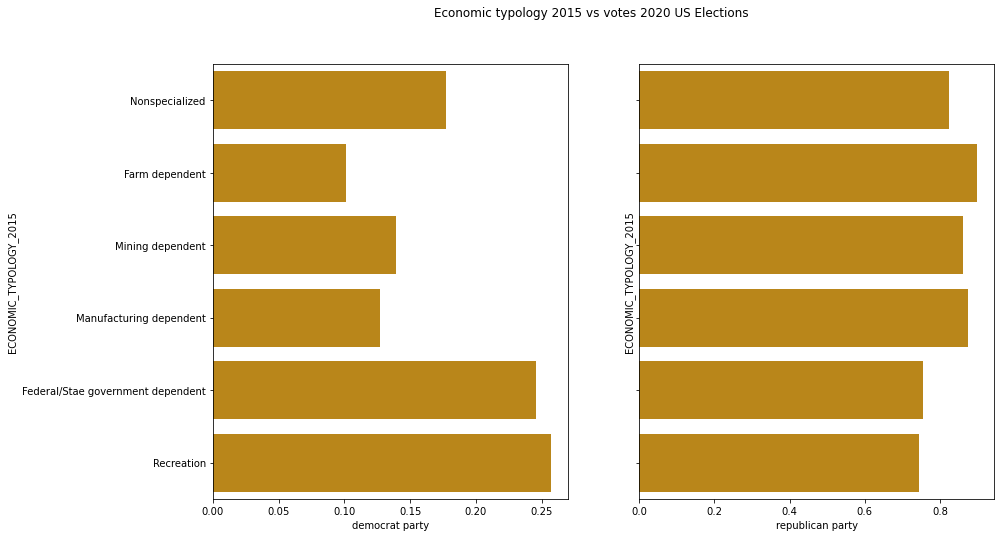

In [83]:
cat_cols = ['ECONOMIC_TYPOLOGY_2015']
y_train = df_presidential_2020["y"]
for col in cat_cols:
    # Construction tableau de contingence
    df_crosstab = (pd.crosstab(index=df_population_prepro[col],
                               columns=y_train,
                               normalize="index")
                   .sort_values("democrat party")
                  )
    # Représentation graphique
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,8))
    fig.suptitle('Economic typology 2015 vs votes 2020 US Elections')
    sns.barplot(x=df_crosstab["democrat party"], y=df_crosstab.index, color="#D38F00", ax=ax1)
    sns.barplot(x=df_crosstab["republican party"],
                           y=df_crosstab.index,
                           color="#D38F00",
                           ax=ax2)

    bar_plot.set(xlabel='')
    plt.show()

In [76]:
eco_types = { 
    0: 'Nonspecialized',
    1: 'Farm dependent',
    2: 'Mining dependent',
    3: 'Manufacturing dependent',
    4: 'Federal/Stae government dependent',
    5: 'Recreation'
}
df_population_prepro[
    "ECONOMIC_TYPOLOGY_2015"] = df_population_prepro["ECONOMIC_TYPOLOGY_2015"].replace(eco_types)

#### Croissement des X et Y

In [ ]:

df_population_prepro_y = pd.merge(df_population_prepro, df_presidential_2020[["COUNTY_FIPS", "y"]], left_on="FIPS_CODE", right_on="COUNTY_FIPS", how="inner")
vars_exp = test.drop("y", axis=1)
vae = test[["y"]]
vae["y"] = vae["y"].astype("category")
num_cols = vars_exp.select_dtypes(include=np.number).columns.tolist()[:50]

# graphic parameters
ncols = 3
nrows = len(num_cols) // ncols + (len(num_cols) % ncols > 0)
plt.figure(figsize=(25, 21))
plt.subplots_adjust(hspace=0.9)
plt.suptitle("Distribution des \nvariables catégorielles", fontsize=18, y=0.95)

for i, col in enumerate(num_cols):
    ax = plt.subplot(nrows, ncols, i + 1)
    
    ax = sns.boxplot(x=vae["y"], y=vars_exp[col], palette=["#011C5D", "#D38F00"])
    ax.set_xlabel("Target")
    ax.grid(b=True, which='major', axis='x')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(f"Distribution {col} with the target", loc= 'center', fontsize=15)


In [ ]:
df_population.head()

### Education data

Rural-Urban Continuum Codes form a classification scheme that distinguishes metropolitan counties by the population size of their metro area, and nonmetropolitan counties by degree of urbanization and adjacency to a metro area.

In [30]:
df_education = read_excel(f"{dir_path}Education.xls")
df_education["Area name"] = df_education["Area name"].replace("Lousiana", "LOUISIANA" )
### explore data
check_nan(df_education)
check_duplicates(df_education, ['FIPS Code', 'State', 'Area name'])

## apply preprocessing
# select only counties
recent_info_education = [
    'LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19',
    'HIGH_SCHOOL_DIPLOMA_ONLY__2015_19',
    'SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19'
]
df_education_prepro = preprocessing_x(df_education.copy(deep=True),
                                      feat_to_keep=recent_info_education)


========== File name US_County_Level_Presidential_Results_08-16.csv

Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2019


There are features with NAN values :
Number of features with NAN = 44
Number of values with NAN = 1417
[Feature] <--- has empty values ---> [percentage of empty values]
2003 Rural-urban Continuum Code  <--->  1.89%
2003 Urban Influence Code       <--->  1.89%
2013 Rural-urban Continuum Code  <--->  1.89%
2013 Urban Influence Code       <--->  1.89%
Less than a high school diploma, 1970  <--->  2.95%
High school diploma only, 1970  <--->  2.95%
Some college (1-3 years), 1970  <--->  2.95%
Four years of college or higher, 1970  <--->  2.95%
Percent of adults with less than a high school diploma, 1970  <--->  2.95%
Percent of adults with a high school diploma only, 1970  <--->  2.95%
Percent of adults completing some college (1-3 years), 1970  <--->  2.95%
Percent of adults completing four years of college or higher, 1970 

C:\Users\vnarv\AppData\Local\Temp\ipykernel_9564\2911557929.py:181: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



# Poverty


In [31]:
df_poverty = read_excel(f"{dir_path}PovertyEstimates.xls")
df_poverty = df_poverty.rename({'Stabr' : 'STATE'}, axis=1)
### explore data
check_nan(df_poverty)
check_duplicates(df_poverty, ['FIPStxt', 'STATE', 'Area_name'])


========== File name US_County_Level_Presidential_Results_08-16.csv

Poverty estimates for the U.S., States, and counties, 2019


There are features with NAN values :
Number of features with NAN = 10
Number of values with NAN = 19064
[Feature] <--- has empty values ---> [percentage of empty values]
Rural-urban_Continuum_Code_2003  <--->  1.79%
Urban_Influence_Code_2003       <--->  1.79%
Rural-urban_Continuum_Code_2013  <--->  1.63%
Urban_Influence_Code_2013       <--->  1.63%
POV04_2019                      <--->  98.37%
CI90LB04_2019                   <--->  98.37%
CI90UB04_2019                   <--->  98.37%
PCTPOV04_2019                   <--->  98.37%
CI90LB04P_2019                  <--->  98.37%
CI90UB04P_2019                  <--->  98.37%



There none duplicates based on keys ['FIPStxt', 'STATE', 'Area_name']


In [32]:
df_poverty_prepro = preprocessing_x(df_poverty.copy(deep=True))


 Features with < 1000 unique values
CI90LB04P_2019      45
PCTPOV04_2019       46
CI90UB04P_2019      50
CI90LB04_2019       53
POV04_2019          53
CI90UB04_2019       53
CI90LB517P_2019    300
CI90LB017P_2019    324
PCTPOV517_2019     396
PCTPOV017_2019     409
CI90UB517P_2019    501
CI90UB017P_2019    502
dtype: int64

Nb of states found: 3112 / 3152
Missing state(s): ['02901', '02902', '02903', '02904', '02905', '02906', '02907', '02908', '02909', '02910', '02911', '02912', '02913', '02914', '02915', '02916', '02917', '02918', '02919', '02920', '02921', '02922', '02923', '02924', '02925', '02926', '02927', '02928', '02929', '02930', '02931', '02932', '02933', '02934', '02935', '02936', '02937', '02938', '02939', '02940']



There are features with NAN values :
Number of features with NAN = 6
Number of values with NAN = 18672
[Feature] <--- has empty values ---> [percentage of empty values]
CI90LB04P_2019                  <--->  100.00%
PCTPOV04_2019                   <--->  100.

C:\Users\vnarv\AppData\Local\Temp\ipykernel_9564\2911557929.py:181: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



# Unemployment

In [37]:
df_unemployment.columns

Index(['fips_txt', 'STATE', 'area_name', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013', 'Civilian_labor_force_2000',
       'Employed_2000', 'Unemployed_2000', 'Unemployment_rate_2000',
       'Civilian_labor_force_2001', 'Employed_2001', 'Unemployed_2001',
       'Unemployment_rate_2001', 'Civilian_labor_force_2002', 'Employed_2002',
       'Unemployed_2002', 'Unemployment_rate_2002',
       'Civilian_labor_force_2003', 'Employed_2003', 'Unemployed_2003',
       'Unemployment_rate_2003', 'Civilian_labor_force_2004', 'Employed_2004',
       'Unemployed_2004', 'Unemployment_rate_2004',
       'Civilian_labor_force_2005', 'Employed_2005', 'Unemployed_2005',
       'Unemployment_rate_2005', 'Civilian_labor_force_2006', 'Employed_2006',
       'Unemployed_2006', 'Unemployment_rate_2006',
       'Civilian_labor_force_2007', 'Employed_2007', 'Unemployed_2007',
       'Unemployment_rate_2007', 'Civilian_labor_force_2008', 'Employed_2008',
       'Unemploy

In [38]:
df_unemployment = read_excel(f"{dir_path}Unemployment.xls")
df_unemployment = df_unemployment.rename({'Stabr' : 'STATE'}, axis=1)
### explore data
check_nan(df_unemployment)
check_duplicates(df_unemployment, ['fips_txt', 'STATE', 'area_name'])


========== File name US_County_Level_Presidential_Results_08-16.csv

Unemployment and median household income for the U.S., States, and counties, 2000-19


There are features with NAN values :
Number of features with NAN = 85
Number of values with NAN = 706
[Feature] <--- has empty values ---> [percentage of empty values]
Rural_urban_continuum_code_2013  <--->  1.71%
Urban_influence_code_2013       <--->  1.71%
Metro_2013                      <--->  1.62%
Civilian_labor_force_2000       <--->  0.15%
Employed_2000                   <--->  0.15%
Unemployed_2000                 <--->  0.15%
Unemployment_rate_2000          <--->  0.15%
Civilian_labor_force_2001       <--->  0.15%
Employed_2001                   <--->  0.15%
Unemployed_2001                 <--->  0.15%
Unemployment_rate_2001          <--->  0.15%
Civilian_labor_force_2002       <--->  0.15%
Employed_2002                   <--->  0.15%
Unemployed_2002                 <--->  0.15%
Unemployment_rate_2002          <--->  0.15%

In [39]:
df_unemployment_prepro = preprocessing_x(df_unemployment.copy(deep=True))


 Features with < 1000 unique values
METRO_2013                  3
UNEMPLOYMENT_RATE_2019    125
UNEMPLOYMENT_RATE_2018    133
UNEMPLOYMENT_RATE_2004    134
UNEMPLOYMENT_RATE_2000    136
UNEMPLOYMENT_RATE_2006    136
UNEMPLOYMENT_RATE_2007    140
UNEMPLOYMENT_RATE_2001    143
UNEMPLOYMENT_RATE_2005    144
UNEMPLOYMENT_RATE_2017    147
UNEMPLOYMENT_RATE_2003    148
UNEMPLOYMENT_RATE_2008    150
UNEMPLOYMENT_RATE_2016    152
UNEMPLOYMENT_RATE_2015    154
UNEMPLOYMENT_RATE_2002    156
UNEMPLOYMENT_RATE_2014    180
UNEMPLOYMENT_RATE_2012    191
UNEMPLOYMENT_RATE_2009    197
UNEMPLOYMENT_RATE_2013    198
UNEMPLOYMENT_RATE_2011    202
UNEMPLOYMENT_RATE_2010    205
dtype: int64

Nb of states found: 3112 / 3152
Missing state(s): ['02901', '02902', '02903', '02904', '02905', '02906', '02907', '02908', '02909', '02910', '02911', '02912', '02913', '02914', '02915', '02916', '02917', '02918', '02919', '02920', '02921', '02922', '02923', '02924', '02925', '02926', '02927', '02928', '02929', '02930'

C:\Users\vnarv\AppData\Local\Temp\ipykernel_9564\2911557929.py:181: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
# split into states and countys

## States
df_education_state = df_education[df_education["AREA_NAME"].isin(state_list)]
states_found = df_education_state["AREA_NAME"].unique()
print(f"Nb of states found: {len(states_found)} / {len(state_list)}")

if len(states_found) != len(state_list):
    state_n_found = [state for state in state_list if state not in states_found]
    print(f"Missing state: {state_n_found}")

# nan check : columns with NAN correspond to the urban code
check_nan(df_education_state)
# drop duplicates
df_education_state = df_education_state.drop_duplicates(["STATE", "AREA_NAME"])

# keep only not null columns
df_education_state_n_nan = df_education_state.dropna(axis=1, how='all')
display(df_education_state_n_nan.head())



In [ ]:
len(county_n_found)